In [1]:
from transformers import CLIPModel
from diffusers import AutoencoderKL
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as fn

In [2]:
# model = CLIPModel.from_pretrained("apple/DFN5B-CLIP-ViT-H-14-378", cache_dir="models/clip")

In [3]:
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", cache_dir="models/vae")

In [4]:
device = "cuda"

In [5]:
vae = vae.to(device)

In [6]:
img = torchvision.io.read_image("image.png").to(torch.float).unsqueeze(0).to(device)
img = fn.resize(img, [192*5,128*5])
img = (img - 128) / 128


In [7]:
latents = vae.encode(img).latent_dist.sample()

d:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\diffusers\models\attention_processor.py:1584: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(


In [8]:
reconstruction = vae.decode(latents).sample

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.025613785..0.9818733].


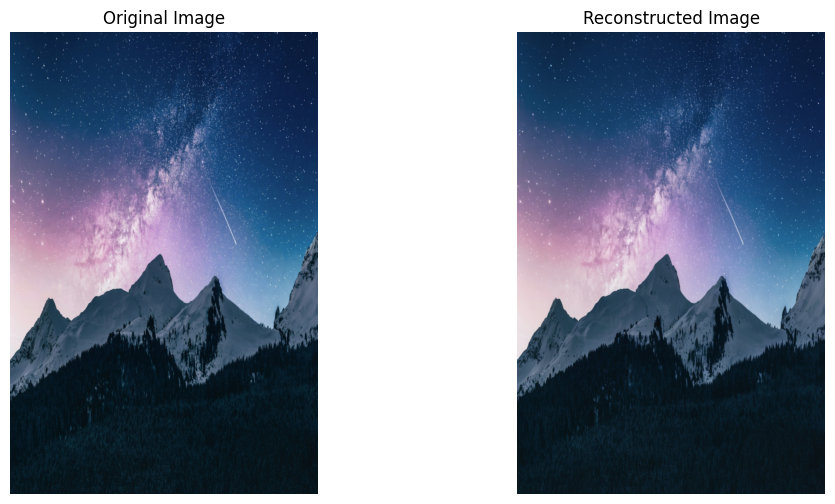

In [9]:
with torch.no_grad():
    # Move the tensors back to the CPU if they are on a GPU and remove the batch dimension
    img_cpu = img.squeeze(0).cpu()
    reconstruction_cpu = reconstruction.squeeze(0).cpu()

    # Convert the tensors to numpy arrays for plotting
    img_np = img_cpu.permute(1, 2, 0).numpy()
    reconstruction_np = reconstruction_cpu.permute(1, 2, 0).numpy()

    # Rescale the reconstructed image from [-1, 1] to [0, 1]
    img_np = (img_np + 1) / 2
    reconstruction_np = (reconstruction_np + 1) / 2

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the original image
    axes[0].imshow(img_np)
    axes[0].set_title('Original Image')
    axes[0].axis('off')  # Hide the axes

    # Display the reconstructed image
    axes[1].imshow(reconstruction_np)
    axes[1].set_title('Reconstructed Image')
    axes[1].axis('off')  # Hide the axes

    # Show the plot
    plt.show()

In [10]:
from transformers import DiT

ImportError: cannot import name 'DiT' from 'transformers' (d:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\__init__.py)